## Exploratory Data Analysis for Ames Housing Dataset

#### Goals:
- Understand the data structure
- Identify data quality issues (missing values, outliers, errors)
- Understand feature distributions
- Identify relationships with target variable
- Form initial hypotheses for feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from zipfile import ZipFile
from scipy.io import arff

In [2]:
PROJECT_ROOT = Path.cwd().parent
DATA_RAW_PATH = PROJECT_ROOT / "data" / "raw"
file_list = [p for p in DATA_RAW_PATH.iterdir() if p.is_file() and p != DATA_RAW_PATH / ".DS_Store"]

for file in file_list:
    if file.suffix == ".csv":
        df_csv = pd.read_csv(file)
    elif file.suffix == ".zip":
        with ZipFile(file, "r") as zip_ref:
            with zip_ref.open("AmesHousing.csv", "r") as f:
                df_zip = pd.read_csv(f)
    elif file.suffix == ".arff":
        data, meta = arff.loadarff(file)
        df_arff = pd.DataFrame(data)
    else:
        print(f"Unknown file type: {file.suffix}")
print("="*100)
print("Zipped file converted to pandas dataframe")
print(df_zip.head())
print(f"Memory usage: {df_zip.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*100)
print("Arff file converted to pandas dataframe")
print(df_arff.head())
print(f"Memory usage: {df_arff.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*100)
print("Csv file converted to pandas dataframe")
print(df_csv.head())
print(f"Memory usage: {df_csv.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Zipped file converted to pandas dataframe
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale 

### Section 1: Data Overview

In this section, we're going to take a look at the data, understand it and make sure we know what we're geting ourselves into. This is the first and critical step of EDA, even before feature engineering (obviously! you can't work with anything you don't understand)

We can start small;
- Get the rows and columns
- Get the data types for the columns
- Group by data type
- Get a better description of the data

In [3]:
df_csv.shape
df_zip.shape
df_arff.shape

print(f"CSV file has {df_csv.shape[0]} rows and {df_csv.shape[1]} columns")
print(f"Zip file has {df_zip.shape[0]} rows and {df_zip.shape[1]} columns")
print(f"Arff file has {df_arff.shape[0]} rows and {df_arff.shape[1]} columns")


CSV file has 2930 rows and 82 columns
Zip file has 2930 rows and 82 columns
Arff file has 2930 rows and 81 columns


In [4]:
df = df_csv.copy()


In [5]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [6]:
df.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")


Numeric columns: ['Order', 'PID', 'area', 'price', 'MS.SubClass', 'Lot.Frontage', 'Lot.Area', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold', 'Yr.Sold']
Categorical columns: ['MS.Zoning', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating', 'Heat

In [10]:
df[numeric_cols].describe()



,Order,PID,area,price,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,...,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,1499.690444,180796.060068,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,...,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444
std,845.96247,1.887308e+08,505.508887,79886.692357,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,...,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613
min,1.00000,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,733.25000,5.284770e+08,1126.000000,129500.000000,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1465.50000,5.354536e+08,1442.000000,160000.000000,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.75000,9.071811e+08,1742.750000,213500.000000,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.00000,1.007100e+09,5642.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
target = 'price'

df[target].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [14]:
skewness = df[target].skew()

print(f"Skewness of {target}: {skewness}")

Skewness of price: 1.7435000757376466


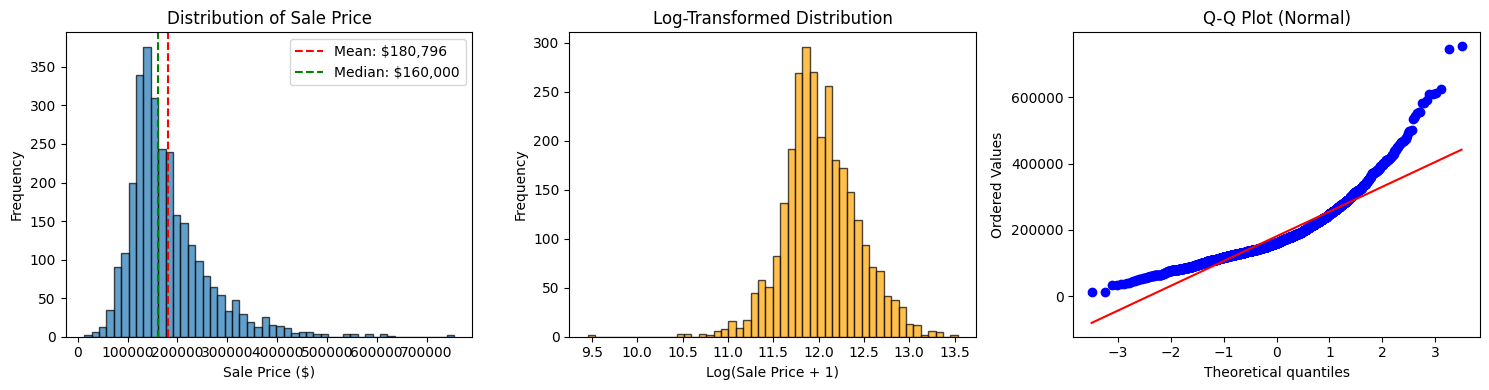


→ INSIGHT: Price is right-skewed. We'll likely use log(price) as target.


In [16]:
# Plot target distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sale Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sale Price')
axes[0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: ${df[target].mean():,.0f}')
axes[0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: ${df[target].median():,.0f}')
axes[0].legend()

# Log-transformed
axes[1].hist(np.log1p(df[target]), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log(Sale Price + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Log-Transformed Distribution')

# Q-Q plot
from scipy import stats
stats.probplot(df[target], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normal)')

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'notebooks' / 'target_distribution.png', dpi=150)
plt.show()

print("\n→ INSIGHT: Price is right-skewed. We'll likely use log(price) as target.")




#### Missing Values

Now we want to do an analysis of missing values for both numerical and categorical to determine how to deal with those missing values


Columns with missing values: 27

Top 15 columns by missing percentage:
                missing_count  percent_missing
Pool.QC                  2917            99.56
Misc.Feature             2824            96.38
Alley                    2732            93.24
Fence                    2358            80.48
Mas.Vnr.Type             1775            60.58
Fireplace.Qu             1422            48.53
Lot.Frontage              490            16.72
Garage.Qual               159             5.43
Garage.Finish             159             5.43
Garage.Yr.Blt             159             5.43
Garage.Cond               159             5.43
Garage.Type               157             5.36
Bsmt.Exposure              83             2.83
BsmtFin.Type.2             81             2.76
Bsmt.Cond                  80             2.73


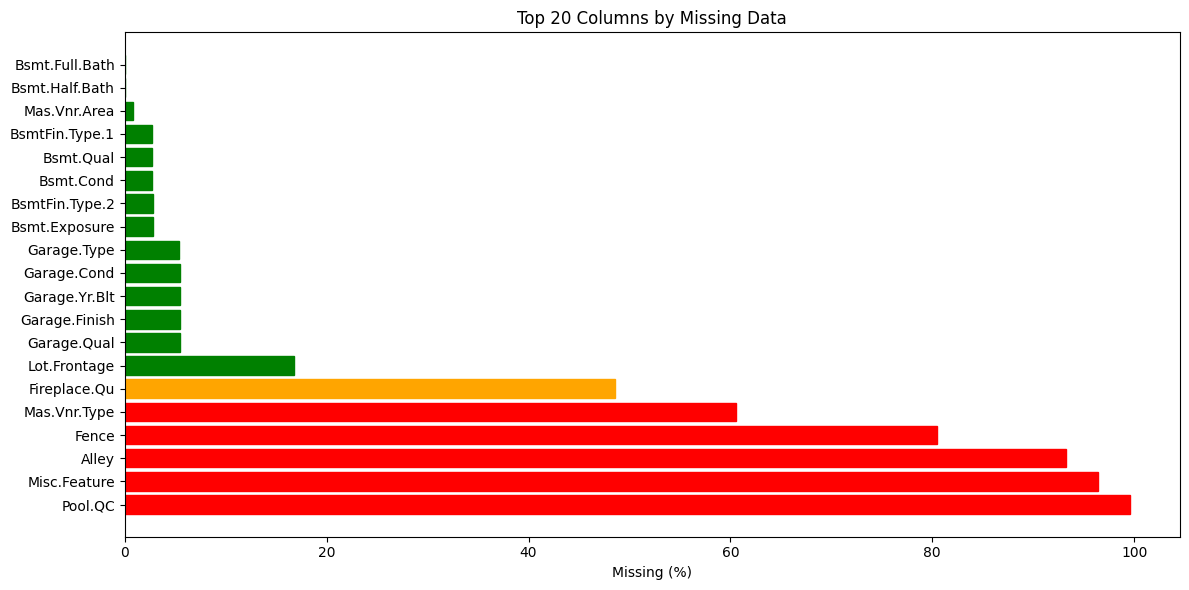

In [21]:
missing = df.isnull().sum()
percent_missing = np.round((missing / len(df)) * 100, 2)
missing_df = pd.DataFrame({'missing_count': missing, 'percent_missing': percent_missing}).sort_values(by='percent_missing', ascending=False)

# Filter to missing columns
missing_df = missing_df[missing_df["missing_count"] > 0]
print(f"\nColumns with missing values: {len(missing_df)}")
print("\nTop 15 columns by missing percentage:")
print(missing_df.head(15).to_string())

if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    top_missing = missing_df.head(20)
    bars = ax.barh(top_missing.index, top_missing['percent_missing'])
    ax.set_xlabel('Missing (%)')
    ax.set_title('Top 20 Columns by Missing Data')
    
    # Color code by severity
    for i, (idx, row) in enumerate(top_missing.iterrows()):
        if row['percent_missing'] > 50:
            bars[i].set_color('red')
        elif row['percent_missing'] > 20:
            bars[i].set_color('orange')
        else:
            bars[i].set_color('green')
    
    plt.tight_layout()
    plt.savefig(PROJECT_ROOT / 'notebooks' / 'missing_values.png', dpi=150)
    plt.show()


In [22]:
print("\n MISSING VALUE STRATEGY:")
for col in missing_df.index:
    percent = missing_df.loc[col, 'percent_missing']
    dtype = df[col].dtype
    
    if percent > 80:
        strategy = "DROP COLUMN (too much missing)"
    elif 'Pool' in col or 'Alley' in col or 'Fence' in col or 'Misc' in col:
        strategy = "FILL with 'None' (missing = no feature)"
    elif 'Garage' in col or 'Bsmt' in col:
        strategy = "FILL with 'None' or 0 (missing = no garage/basement)"
    elif dtype == 'object':
        strategy = "FILL with mode (most common)"
    else:
        strategy = "FILL with median"
    
    print(f"  {col}: {percent:.1f}% missing → {strategy}")


 MISSING VALUE STRATEGY:
  Pool.QC: 99.6% missing → DROP COLUMN (too much missing)
  Misc.Feature: 96.4% missing → DROP COLUMN (too much missing)
  Alley: 93.2% missing → DROP COLUMN (too much missing)
  Fence: 80.5% missing → DROP COLUMN (too much missing)
  Mas.Vnr.Type: 60.6% missing → FILL with mode (most common)
  Fireplace.Qu: 48.5% missing → FILL with mode (most common)
  Lot.Frontage: 16.7% missing → FILL with median
  Garage.Qual: 5.4% missing → FILL with 'None' or 0 (missing = no garage/basement)
  Garage.Finish: 5.4% missing → FILL with 'None' or 0 (missing = no garage/basement)
  Garage.Yr.Blt: 5.4% missing → FILL with 'None' or 0 (missing = no garage/basement)
  Garage.Cond: 5.4% missing → FILL with 'None' or 0 (missing = no garage/basement)
  Garage.Type: 5.4% missing → FILL with 'None' or 0 (missing = no garage/basement)
  Bsmt.Exposure: 2.8% missing → FILL with 'None' or 0 (missing = no garage/basement)
  BsmtFin.Type.2: 2.8% missing → FILL with 'None' or 0 (missing = 

In [ ]:
print("SECTION 4: CATEGORICAL FEATURES")
print("="*60)

print(f"\nAnalyzing {len(categorical_cols)} categorical columns...")

# Check cardinality (number of unique values)
cardinality = df[categorical_cols].nunique().sort_values(ascending=False)
print("\nCardinality (unique values per column):")
print(cardinality)

# High cardinality features need special handling
high_cardinality = cardinality[cardinality > 10]
low_cardinality = cardinality[cardinality <= 10]

print(f"\nHigh cardinality (>10 unique): {len(high_cardinality)} columns")
print(f"Low cardinality (≤10 unique): {len(low_cardinality)} columns")



SECTION 4: CATEGORICAL FEATURES

Analyzing 43 categorical columns...

Cardinality (unique values per column):
Neighborhood      28
Exterior.2nd      17
Exterior.1st      16
Sale.Type         10
Condition.1        9
Functional         8
Condition.2        8
House.Style        8
Roof.Matl          8
MS.Zoning          7
Garage.Type        6
Heating            6
BsmtFin.Type.2     6
BsmtFin.Type.1     6
Foundation         6
Sale.Condition     6
Roof.Style         6
Lot.Config         5
Misc.Feature       5
Garage.Cond        5
Garage.Qual        5
Fireplace.Qu       5
Kitchen.Qual       5
Heating.QC         5
Electrical         5
Bsmt.Qual          5
Bsmt.Cond          5
Bldg.Type          5
Exter.Cond         5
Bsmt.Exposure      4
Exter.Qual         4
Mas.Vnr.Type       4
Land.Contour       4
Fence              4
Lot.Shape          4
Pool.QC            4
Paved.Drive        3
Land.Slope         3
Utilities          3
Garage.Finish      3
Street             2
Central.Air        2
Alley   

/var/folders/j4/_ks1c1ld2ylgl5j3c9wry0dc0000gn/T/ipykernel_6019/2878985394.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/j4/_ks1c1ld2ylgl5j3c9wry0dc0000gn/T/ipykernel_6019/2878985394.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/j4/_ks1c1ld2ylgl5j3c9wry0dc0000gn/T/ipykernel_6019/2878985394.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/j4/_ks1c1ld2ylgl5j3c9wry0dc0000gn/T/ipykernel_6019/2878985394.py:12: UserWarning: set_ticklabels() should only be used with

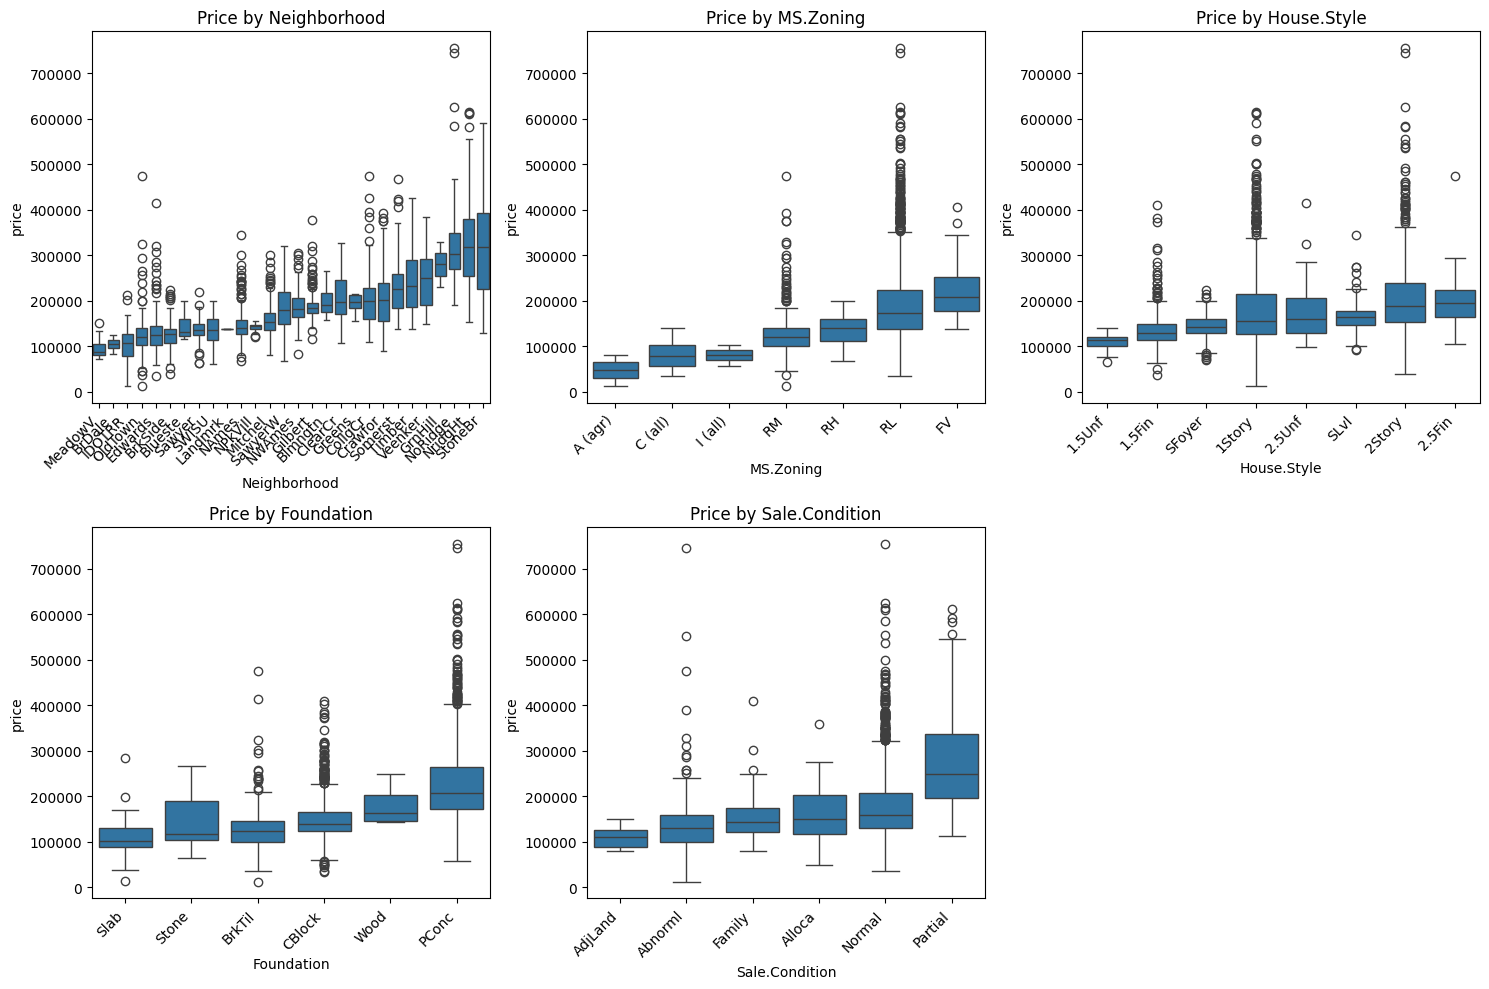

In [24]:
# Analyze a few important categorical features
important_cats = ['Neighborhood', 'MS.Zoning', 'House.Style', 'Foundation', 'Sale.Condition']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(important_cats):
    if col in df.columns:
        # Box plot of price by category
        order = df.groupby(col)[target].median().sort_values().index
        sns.boxplot(data=df, x=col, y=target, order=order, ax=axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        axes[i].set_title(f'Price by {col}')

# Remove empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'notebooks' / 'categorical_analysis.png', dpi=150)
plt.show()

In [25]:
print("\n" + "="*60)
print("SECTION 5: NUMERICAL FEATURES")
print("="*60)

# Correlation with target
correlations = df[numeric_cols].corrwith(df[target]).sort_values(ascending=False)
print("\nTop 15 correlations with price:")
print(correlations.head(15))

print("\nBottom 5 correlations (negative):")
print(correlations.tail(5))


SECTION 5: NUMERICAL FEATURES

Top 15 correlations with price:
price             1.000000
Overall.Qual      0.799262
area              0.706780
Garage.Cars       0.647877
Garage.Area       0.640401
Total.Bsmt.SF     0.632280
X1st.Flr.SF       0.621676
Year.Built        0.558426
Full.Bath         0.545604
Year.Remod.Add    0.532974
Garage.Yr.Blt     0.526965
Mas.Vnr.Area      0.508285
TotRms.AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin.SF.1      0.432914
dtype: float64

Bottom 5 correlations (negative):
MS.SubClass      -0.085092
Overall.Cond     -0.101697
Kitchen.AbvGr    -0.119814
Enclosed.Porch   -0.128787
PID              -0.246521
dtype: float64


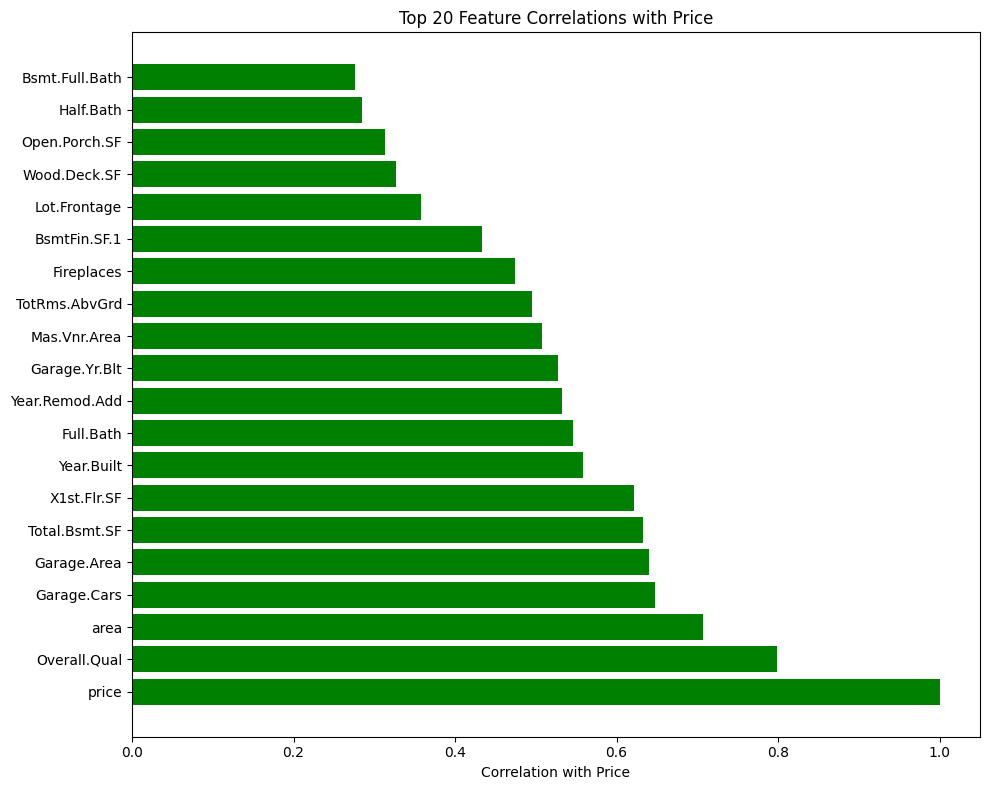

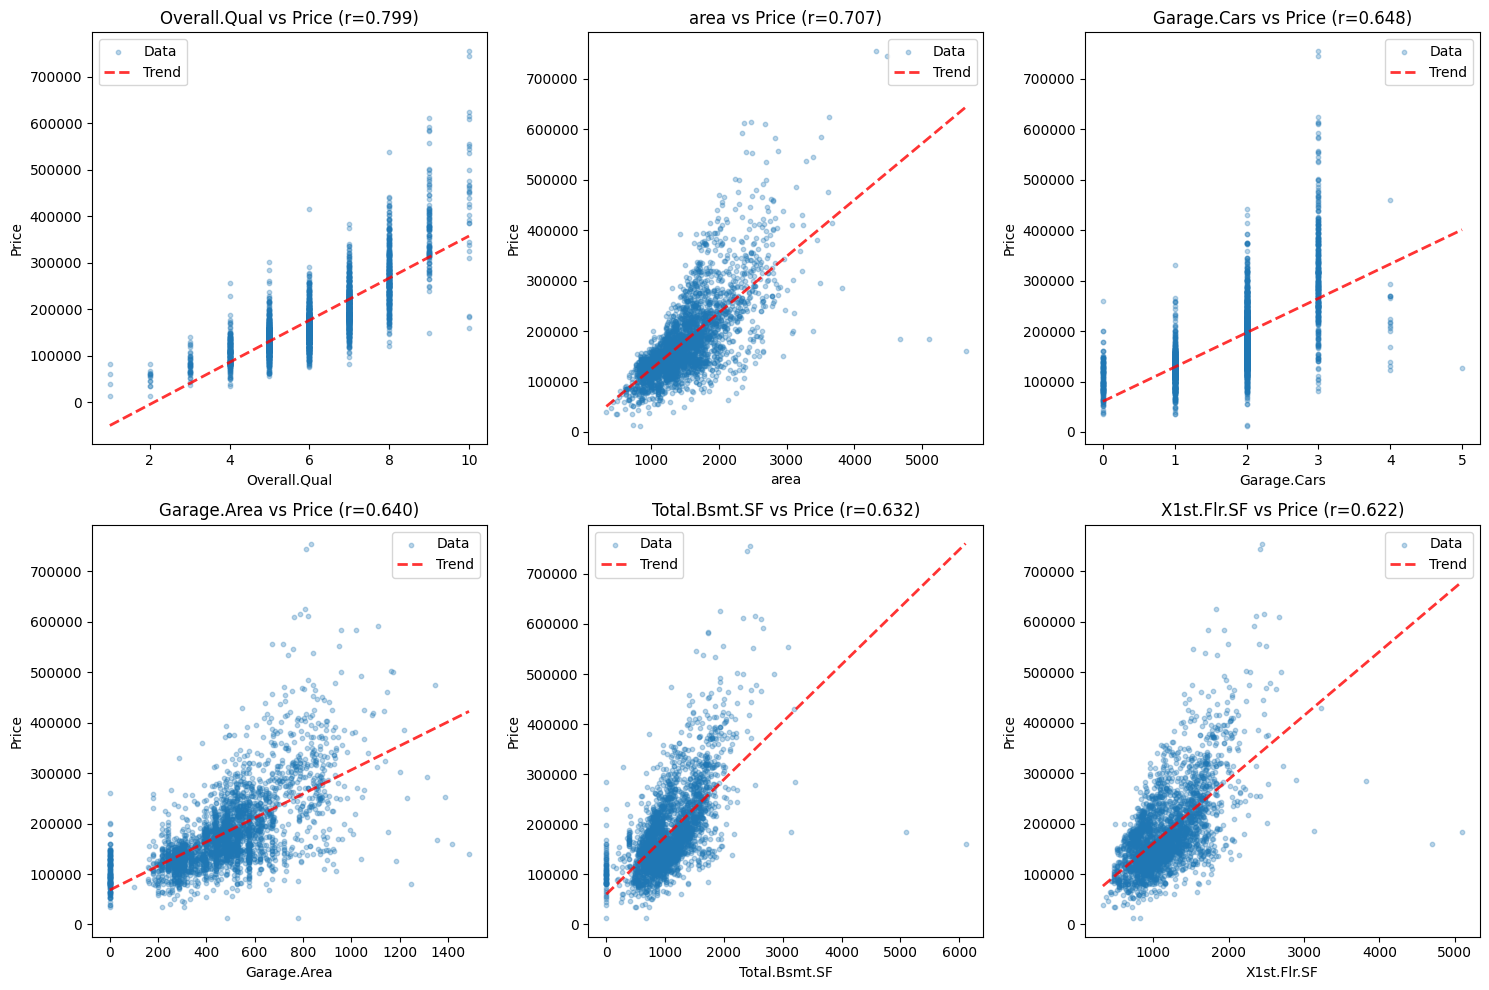

In [29]:
# Plot correlations
fig, ax = plt.subplots(figsize=(10, 8))
top_corr = correlations.head(20)
colors = ['green' if x > 0 else 'red' for x in top_corr]
ax.barh(top_corr.index, top_corr.values, color=colors)
ax.set_xlabel('Correlation with Price')
ax.set_title('Top 20 Feature Correlations with Price')
ax.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'notebooks' / 'correlations.png', dpi=150)
plt.show()

# Scatter plots of top features vs price
top_features = ['Overall.Qual', 'area', 'Garage.Cars', 'Garage.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(top_features):
    if col in df.columns:
        axes[i].scatter(df[col], df[target], alpha=0.3, s=10)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Price')
        axes[i].set_title(f'{col} vs Price (r={correlations[col]:.3f})')
        
        # Add trend line
        z = np.polyfit(df[col].dropna(), df.loc[df[col].notna(), target], 1)
        p = np.poly1d(z)
        x_line = np.linspace(df[col].min(), df[col].max(), 100)
        axes[i].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)
        axes[i].legend(["Data", "Trend"])

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'notebooks' / 'scatter_plots.png', dpi=150)
plt.show()



SECTION 6: OUTLIER DETECTION


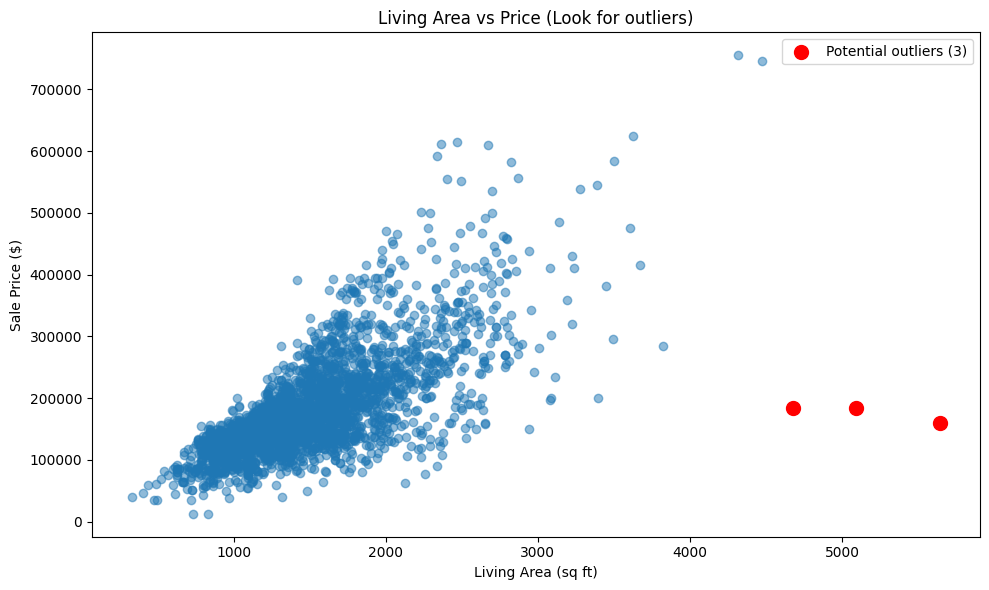


Potential outliers (large area, low price): 3
      Order  area   price  Overall.Qual Sale.Condition
1498   1499  5642  160000            10        Partial
2180   2181  5095  183850            10        Partial
2181   2182  4676  184750            10        Partial


In [30]:
print("\n" + "="*60)
print("SECTION 6: OUTLIER DETECTION")
print("="*60)

# The dataset documentation mentions 5 outliers to consider removing
# Let's identify them

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['area'], df[target], alpha=0.5)
ax.set_xlabel('Living Area (sq ft)')
ax.set_ylabel('Sale Price ($)')
ax.set_title('Living Area vs Price (Look for outliers)')

# Highlight potential outliers
outlier_mask = (df['area'] > 4000) & (df[target] < 300000)
outliers = df[outlier_mask]
ax.scatter(outliers['area'], outliers[target], color='red', s=100, 
           label=f'Potential outliers ({len(outliers)})')
ax.legend()

plt.tight_layout()
plt.savefig(PROJECT_ROOT / 'notebooks' / 'outliers.png', dpi=150)
plt.show()

print(f"\nPotential outliers (large area, low price): {len(outliers)}")
if len(outliers) > 0:
    print(outliers[['Order', 'area', target, 'Overall.Qual', 'Sale.Condition']])

In [32]:
# Statistical outlier detection using IQR
def find_outliers_iqr(series, multiplier=1.5):
    """Find outliers using IQR method."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return (series < lower) | (series > upper)

print("\nOutliers by IQR method (1.5x):")
for col in numeric_cols:
    if col in df.columns:
        n_outliers = find_outliers_iqr(df[col].dropna()).sum()
        pct = n_outliers / len(df) * 100
        print(f"  {col}: {n_outliers} outliers ({pct:.1f}%)")


Outliers by IQR method (1.5x):
  Order: 0 outliers (0.0%)
  PID: 0 outliers (0.0%)
  area: 75 outliers (2.6%)
  price: 137 outliers (4.7%)
  MS.SubClass: 208 outliers (7.1%)
  Lot.Frontage: 187 outliers (6.4%)
  Lot.Area: 127 outliers (4.3%)
  Overall.Qual: 4 outliers (0.1%)
  Overall.Cond: 252 outliers (8.6%)
  Year.Built: 9 outliers (0.3%)
  Year.Remod.Add: 0 outliers (0.0%)
  Mas.Vnr.Area: 200 outliers (6.8%)
  BsmtFin.SF.1: 15 outliers (0.5%)
  BsmtFin.SF.2: 351 outliers (12.0%)
  Bsmt.Unf.SF: 56 outliers (1.9%)
  Total.Bsmt.SF: 123 outliers (4.2%)
  X1st.Flr.SF: 43 outliers (1.5%)
  X2nd.Flr.SF: 8 outliers (0.3%)
  Low.Qual.Fin.SF: 40 outliers (1.4%)
  Bsmt.Full.Bath: 2 outliers (0.1%)
  Bsmt.Half.Bath: 175 outliers (6.0%)
  Full.Bath: 4 outliers (0.1%)
  Half.Bath: 0 outliers (0.0%)
  Bedroom.AbvGr: 78 outliers (2.7%)
  Kitchen.AbvGr: 134 outliers (4.6%)
  TotRms.AbvGrd: 51 outliers (1.7%)
  Fireplaces: 13 outliers (0.4%)
  Garage.Yr.Blt: 3 outliers (0.1%)
  Garage.Cars: 17 outl


SECTION 7: MULTICOLLINEARITY CHECK


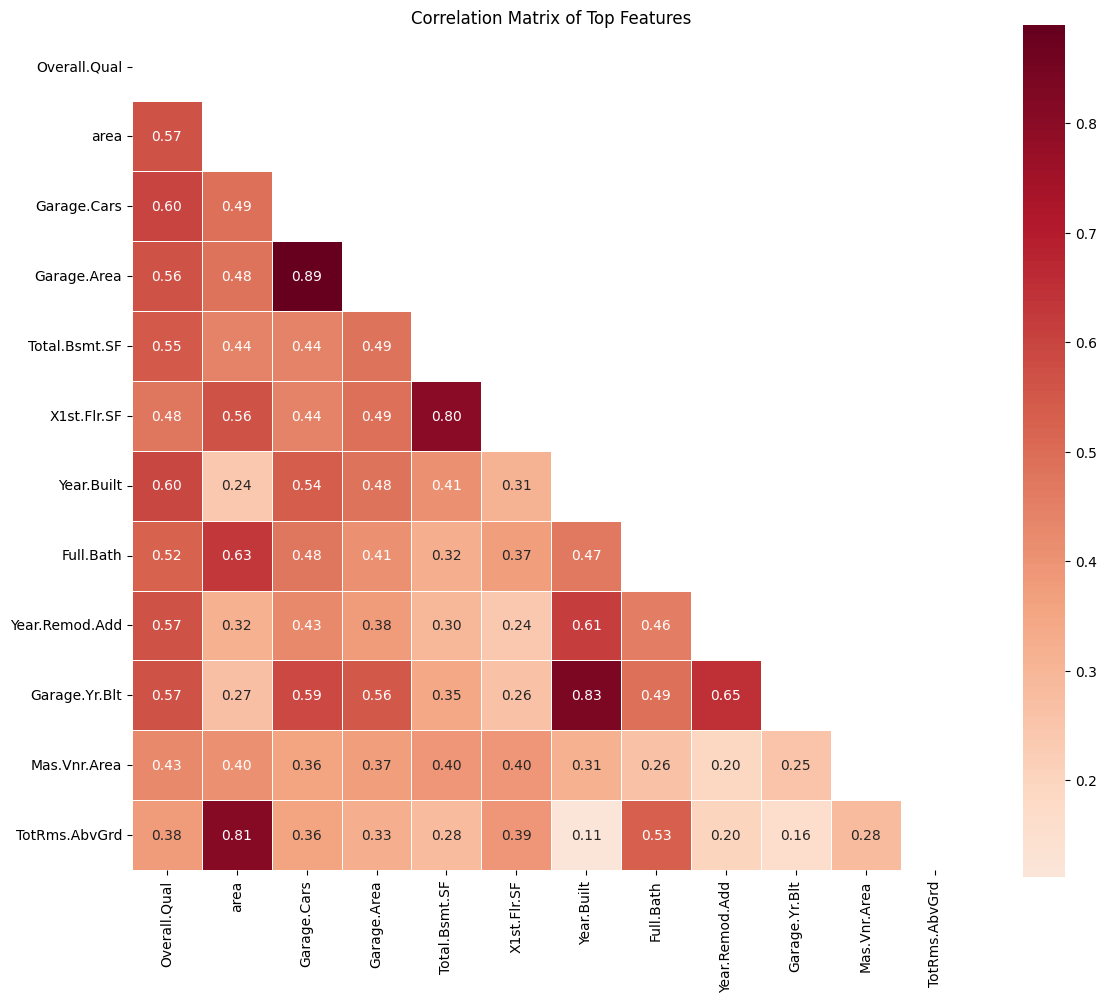


Highly correlated feature pairs (|r| > 0.8):
  area ↔ TotRms.AbvGrd: r = 0.808
  Garage.Cars ↔ Garage.Area: r = 0.890
  Total.Bsmt.SF ↔ X1st.Flr.SF: r = 0.801
  Year.Built ↔ Garage.Yr.Blt: r = 0.835

→ INSIGHT: Some features are highly correlated.
   Consider: Keep one, create ratio, or use regularization.


In [33]:
print("\n" + "="*60)
print("SECTION 7: MULTICOLLINEARITY CHECK")
print("="*60)

# Correlation heatmap of top features
top_numeric = correlations.head(15).index.tolist()
top_numeric = [c for c in top_numeric if c != target][:12]  # Exclude target, limit to 12

if len(top_numeric) > 0:
    corr_matrix = df[top_numeric].corr()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='RdBu_r', center=0, ax=ax,
                square=True, linewidths=0.5)
    ax.set_title('Correlation Matrix of Top Features')
    plt.tight_layout()
    plt.savefig(PROJECT_ROOT / 'notebooks' / 'correlation_matrix.png', dpi=150)
    plt.show()

# Identify highly correlated feature pairs
print("\nHighly correlated feature pairs (|r| > 0.8):")
for i, col1 in enumerate(top_numeric):
    for col2 in top_numeric[i+1:]:
        corr = df[col1].corr(df[col2])
        if abs(corr) > 0.8:
            print(f"  {col1} ↔ {col2}: r = {corr:.3f}")

print("\n→ INSIGHT: Some features are highly correlated.")
print("   Consider: Keep one, create ratio, or use regularization.")


SECTION 8: TEMPORAL ANALYSIS

Yearly price statistics:
                  mean    median  count
Yr.Sold                                
2006     181761.648000  159500.0    625
2007     185138.207493  165125.0    694
2008     178841.750804  161000.0    622
2009     181404.567901  160850.0    648
2010     172597.598240  155000.0    341


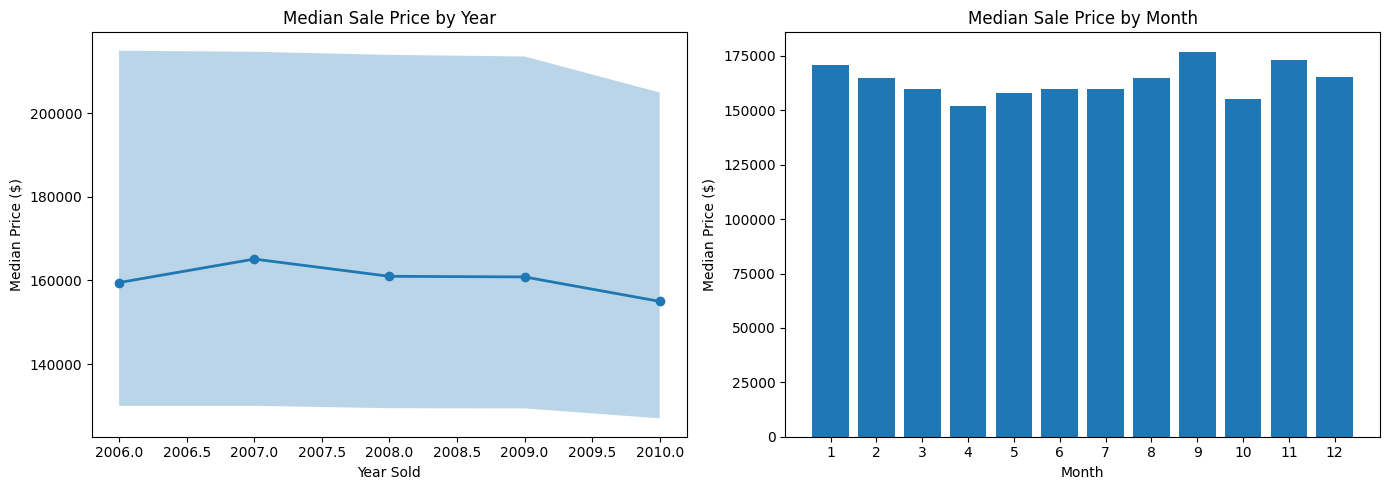

In [34]:
print("\n" + "="*60)
print("SECTION 8: TEMPORAL ANALYSIS")
print("="*60)

if 'Yr.Sold' in df.columns and 'Mo.Sold' in df.columns:
    # Price trends over time
    yearly_avg = df.groupby('Yr.Sold')[target].agg(['mean', 'median', 'count'])
    print("\nYearly price statistics:")
    print(yearly_avg)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Yearly trend
    axes[0].plot(yearly_avg.index, yearly_avg['median'], marker='o', linewidth=2)
    axes[0].fill_between(yearly_avg.index, 
                         df.groupby('Yr.Sold')[target].quantile(0.25),
                         df.groupby('Yr.Sold')[target].quantile(0.75),
                         alpha=0.3)
    axes[0].set_xlabel('Year Sold')
    axes[0].set_ylabel('Median Price ($)')
    axes[0].set_title('Median Sale Price by Year')
    
    # Monthly seasonality
    monthly_avg = df.groupby('Mo.Sold')[target].median()
    axes[1].bar(monthly_avg.index, monthly_avg.values)
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Median Price ($)')
    axes[1].set_title('Median Sale Price by Month')
    axes[1].set_xticks(range(1, 13))
    
    plt.tight_layout()
    plt.savefig(PROJECT_ROOT / 'notebooks' / 'temporal_analysis.png', dpi=150)
    plt.show()

In [35]:
df[target].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [37]:
# Save EDA summary
eda_summary = {
    'n_rows': len(df),
    'n_cols': len(df.columns),
    'n_numeric': len(numeric_cols),
    'n_categorical': len(categorical_cols),
    'n_missing_cols': len(missing_df),
    'target_skewness': skewness,
    'top_correlations': correlations.head(10).to_dict()
}
eda_summary

{'n_rows': 2930,
 'n_cols': 82,
 'n_numeric': 39,
 'n_categorical': 43,
 'n_missing_cols': 27,
 'target_skewness': np.float64(1.7435000757376466),
 'top_correlations': {'price': 1.0,
  'Overall.Qual': 0.7992617947690229,
  'area': 0.7067799209766277,
  'Garage.Cars': 0.6478765953956589,
  'Garage.Area': 0.6404007669873961,
  'Total.Bsmt.SF': 0.6322804571065126,
  'X1st.Flr.SF': 0.6216760632702534,
  'Year.Built': 0.5584261057120455,
  'Full.Bath': 0.5456039005201104,
  'Year.Remod.Add': 0.5329737540266948}}